### Importar las librerias

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

### Preparación de los datos

In [22]:
# Preparación de los datos
# Cargar los datos desde el archivo CSV
data = pd.read_csv("HOG.csv")

# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop("etiqueta", axis=1)  # Características
y = data["etiqueta"]  # Etiquetas

In [23]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X) ## 100% test (cross validation)

### Modelo

In [24]:
learning_rate = 0.2 # Tasa de aprendizaje
hidden_layers = (15)  # Número de capas ocultas y número de neuronas en cada capa
momentum_descent = 0.4  # Momentum
rand_state = 11

# Crear el clasificador MLP
mlp_classifier = MLPClassifier(
                        # No se cambian
                        max_iter = 1000,
                        activation = 'logistic',
                        solver= 'adam',
                        tol = 1e-6,
                        # verbose=True, # Solo para ver los resultados en "tiempo real"

                        # Si cambian
                        learning_rate_init = learning_rate,
                        hidden_layer_sizes = hidden_layers,
                        momentum = momentum_descent,
                        random_state = rand_state
                        )

# Entrenar el clasificador
# mlp_classifier.fit(X_train_scaled, y_train)

# Obtener la exactitud del modelo en GENERAL
# y_pred = mlp_classifier.predict(X_test_scaled) # Prediccion
# print(accuracy_score(y_test, y_pred)) # Precision exacta

scores = cross_val_score(mlp_classifier, X_train, y, cv=15)

# Resultado redondeado
# print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print("Scores:", scores)
print("Average Accuracy:", scores.mean())

Scores: [0.655 0.69  0.665 0.655 0.72  0.725 0.74  0.71  0.725 0.61  0.69  0.71
 0.75  0.65  0.705]
Average Accuracy: 0.6933333333333332


### Overfitting o underfitting?

In [25]:
# Evaluar la precisión del modelo para ver si hay overfitting o underfitting
train_accuracy = mlp_classifier.score(X_train_scaled, y_train)
test_accuracy = mlp_classifier.score(X_test_scaled, y_test)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Gráfica de pérdida

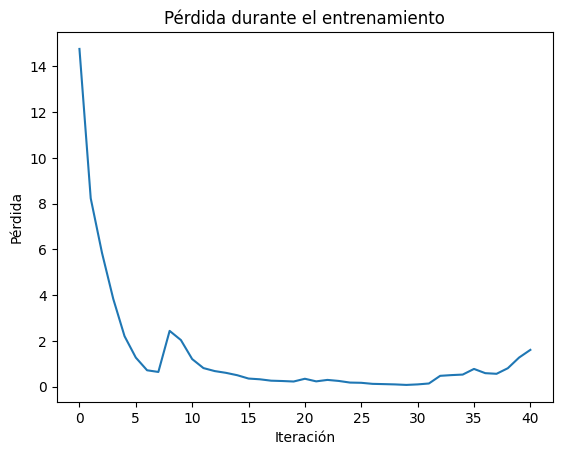

In [ ]:
# Obtener la pérdida de cada iteración
loss_curve = mlp_classifier.loss_curve_

# Graficar la pérdida de cada iteración
plt.plot(loss_curve)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()

### Matriz de confusión

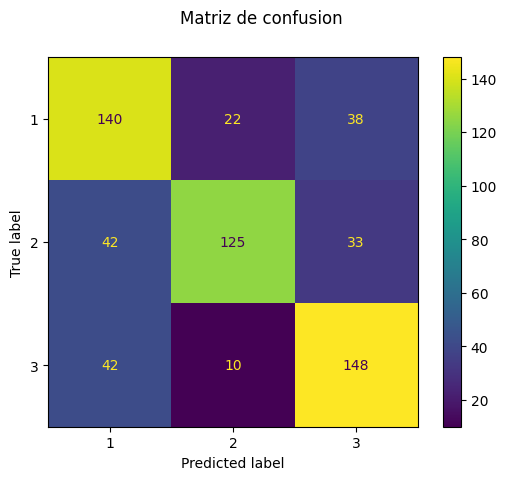

In [ ]:
fig = ConfusionMatrixDisplay.from_estimator(mlp_classifier, X_test_scaled, y_test, display_labels=mlp_classifier.classes_)
fig.figure_.suptitle("Matriz de confusion")
plt.show()

### Un poco más de resultadossss

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.70      0.66       200
           2       0.80      0.62      0.70       200
           3       0.68      0.74      0.71       200

    accuracy                           0.69       600
   macro avg       0.70      0.69      0.69       600
weighted avg       0.70      0.69      0.69       600

